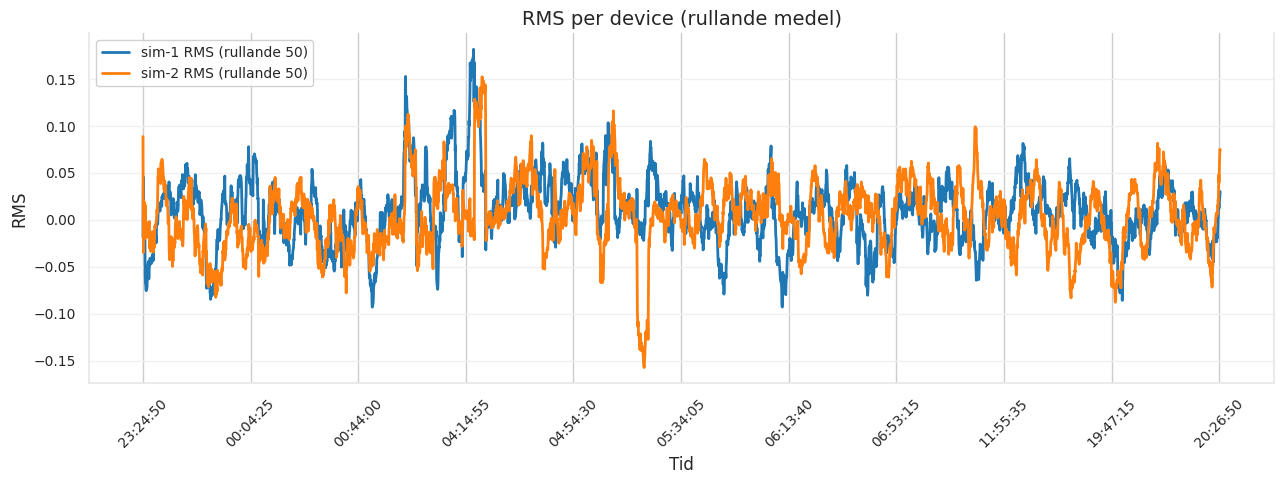

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1) Läs TSV och fixa svenska decimaler
df = pd.read_csv("iiot_rms.csv", sep="\t", encoding="utf-8-sig")
df.columns = df.columns.str.strip()
df["RMS"] = pd.to_numeric(df["RMS"].astype(str).str.replace(",", ".", regex=False), errors="coerce")

# 2) Sortera och rullande medel (justera win efter behov, t.ex. 50–200 punkter)
df = df.sort_values(["device_id", "Date", "time"])
win = 50
df["RMS_roll"] = df.groupby("device_id")["RMS"].rolling(win, min_periods=1).mean().reset_index(level=0, drop=True)

# 3) Stil
plt.rcParams.update({
    "figure.figsize": (13, 5),
    "axes.edgecolor": "#e6e6e6",
    "axes.linewidth": 1.2,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# 4) Plotta RMS per device (rullande)
fig, ax = plt.subplots()
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for i, (dev, g) in enumerate(df.groupby("device_id")):
    ax.plot(g["time"], g["RMS_roll"], color=palette[i % len(palette)],
            linewidth=2, label=f"{dev} RMS (rullande {win})")

# 5) Glesa ut x-etiketter (≈10 etiketter totalt)
unique_times = df["time"].astype(str).unique()
step = max(1, len(unique_times)//10)
ax.set_xticks(unique_times[::step])
ax.tick_params(axis="x", rotation=45)

ax.set_title("RMS per device (rullande medel)")
ax.set_xlabel("Tid")
ax.set_ylabel("RMS")
ax.spines["top"].set_visible(False)
ax.grid(True, axis="y", color="#f0f0f0")
ax.legend(loc="upper left", frameon=True, fancybox=True, framealpha=0.9)

plt.tight_layout()
plt.show()
# plt.savefig("rms_rullande.png", dpi=180, bbox_inches="tight")


### RMS per Enhet (Rullande Medelvärde)

Grafen visar de rullande RMS-nivåerna (Root Mean Square) för sim-1 och sim-2. RMS beräknas som kvadratroten av medelvärdet av signalens kvadrerade amplituder:

$$ \text{RMS} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2} $$

Beräkningen utförs per axel (ax, ay, az) i RMS-tjänsten och representerar signalens genomsnittliga energinivå. Ett rullande medelvärde över 50 punkter tillämpas för att jämna ut brus och tydliggöra trender.

Stabila värden nära noll indikerar normal drift, medan toppar tyder på ökad vibration eller mekaniska avvikelser.

### Vad är RMS (Root Mean Square)?

RMS mäter en signals genomsnittliga energinivå. I praktiken beskriver RMS hur stark eller intensiv en signal är över tid, även när signalen oscillerar runt noll.

Beräkningen sker i tre steg:

1. Kvadrera varje mätvärde (vilket gör negativa och positiva värden positiva)
2. Beräkna medelvärdet av de kvadrerade värdena
3. Ta kvadratroten av resultatet

Där x_i representerar signalens uppmätta värden och N är antalet observationer.

### Tillämpning i IIoT-Projekt

 RMS-tjänst körs denna beräkning kontinuerligt för varje axel (ax, ay, az) baserat på vibrationssignaler från maskineriet. Höga RMS-värden indikerar ökande vibrationsenergi, vilket ofta signalerar obalans, slitage eller andra mekaniska avvikelser. Stabila RMS-värden visar att maskinen arbetar jämnt och normalt.

 Ger en övergripande bild av maskinens hälsotillstånd och används för att upptäcka gradvisa förändringar över tid.

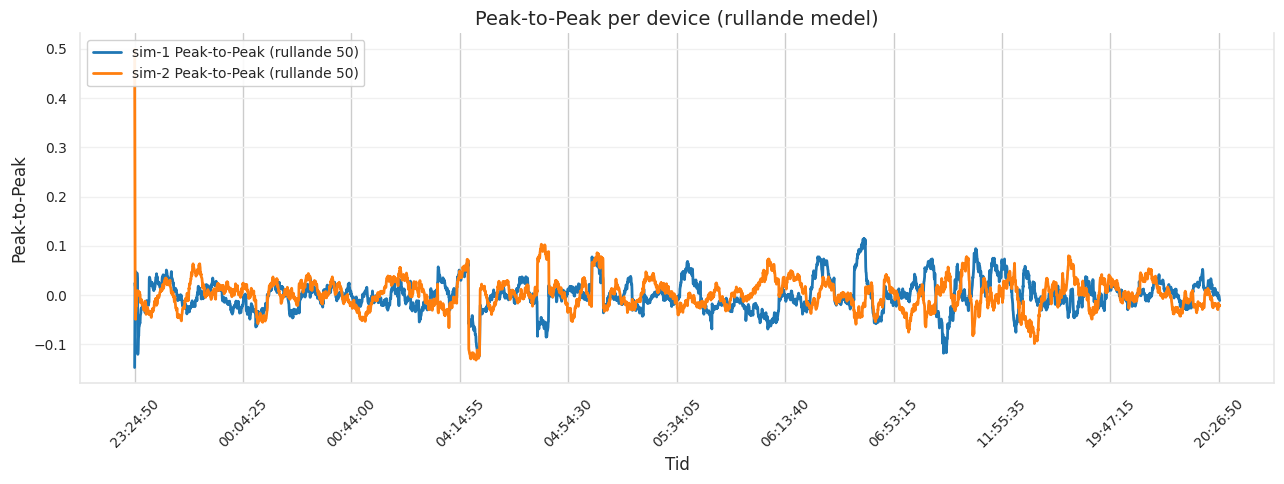

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 
df = pd.read_csv("iiot_rms.csv", sep="\t", encoding="utf-8-sig")
df.columns = df.columns.str.strip()
df["Peak-to-Peak"] = pd.to_numeric(df["Peak-to-Peak"].astype(str).str.replace(",", ".", regex=False),
                                   errors="coerce")

# 2) Sortera och rullande medel 
win = 50
df = df.sort_values(["device_id", "Date", "time"])
df["P2P_roll"] = (df.groupby("device_id")["Peak-to-Peak"]
                    .rolling(win, min_periods=1).mean()
                    .reset_index(level=0, drop=True))

# 3) Stil (matchar RMS)
plt.rcParams.update({
    "figure.figsize": (13, 5),
    "axes.edgecolor": "#e6e6e6",
    "axes.linewidth": 1.2,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# 4) Plotta per device
fig, ax = plt.subplots()
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for i, (dev, g) in enumerate(df.groupby("device_id")):
    ax.plot(g["time"], g["P2P_roll"],
            color=palette[i % len(palette)], linewidth=2,
            label=f"{dev} Peak-to-Peak (rullande {win})")

# 5) Glesa tidsaxel (≈10 etiketter)
unique_times = df["time"].astype(str).unique()
step = max(1, len(unique_times)//10)
ax.set_xticks(unique_times[::step])
ax.tick_params(axis="x", rotation=45)

ax.set_title("Peak-to-Peak per device (rullande medel)")
ax.set_xlabel("Tid")
ax.set_ylabel("Peak-to-Peak")
ax.spines["top"].set_visible(False)
ax.grid(True, axis="y", color="#f0f0f0")
ax.legend(loc="upper left", frameon=True, fancybox=True, framealpha=0.9)

plt.tight_layout()
plt.show()
# plt.savefig("peak_to_peak_rullande.png", dpi=180, bbox_inches="tight")



📈 Peak-to-Peak per Enhet (Rullande Medelvärde)

Grafen visar de rullande Peak-to-Peak-nivåerna för sim-1 och sim-2.
Måttet beräknas som skillnaden mellan signalens högsta och lägsta värde i ett givet tidsfönster:

$$P2P=max(xi​)−min(xi​)$$
Beräkningen görs per axel i vibrationssignalen och visar spännvidden i amplituden, vilket avslöjar kortvariga variationer eller stötar.
Ett rullande medelvärde på 50 punkter används för att filtrera bort brus och framhäva de tydliga mönstren.

Höga värden: plötsliga kraftiga vibrationer → kan tyda på slag, stöt eller obalans.

Låga värden: jämnare drift och stabil mekanisk balans.

Detta mått hjälper till att identifiera transienta händelser i signalen som inte nödvändigtvis syns i RMS-nivån.

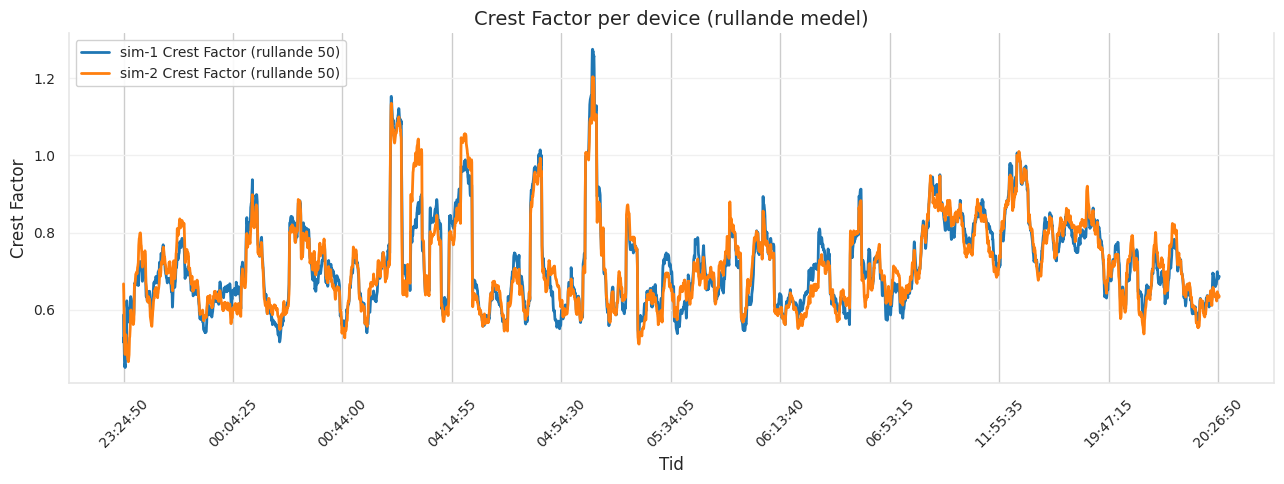

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Läs TSV och fixa svenska decimaler
df = pd.read_csv("iiot_rms.csv", sep="\t", encoding="utf-8-sig")
df.columns = df.columns.str.strip()
df["Crest Factor"] = pd.to_numeric(df["Crest Factor"].astype(str).str.replace(",", ".", regex=False),
                                   errors="coerce")

# 2) Sortera och rullande medel (samma som tidigare)
win = 50
df = df.sort_values(["device_id", "Date", "time"])
df["CF_roll"] = (df.groupby("device_id")["Crest Factor"]
                   .rolling(win, min_periods=1).mean()
                   .reset_index(level=0, drop=True))

# 3) Stil (samma som RMS/P2P)
plt.rcParams.update({
    "figure.figsize": (13, 5),
    "axes.edgecolor": "#e6e6e6",
    "axes.linewidth": 1.2,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# 4) Plotta per device
fig, ax = plt.subplots()
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for i, (dev, g) in enumerate(df.groupby("device_id")):
    ax.plot(g["time"], g["CF_roll"],
            color=palette[i % len(palette)], linewidth=2,
            label=f"{dev} Crest Factor (rullande {win})")

# 5) Glesa ut x-etiketter (≈10)
unique_times = df["time"].astype(str).unique()
step = max(1, len(unique_times)//10)
ax.set_xticks(unique_times[::step])
ax.tick_params(axis="x", rotation=45)

ax.set_title("Crest Factor per device (rullande medel)")
ax.set_xlabel("Tid")
ax.set_ylabel("Crest Factor")
ax.spines["top"].set_visible(False)
ax.grid(True, axis="y", color="#f0f0f0")
ax.legend(loc="upper left", frameon=True, fancybox=True, framealpha=0.9)

plt.tight_layout()
plt.show()
# plt.savefig("crest_factor_rullande.png", dpi=180, bbox_inches="tight")


### Crest Factor per Enhet (Rullande Medelvärde)

Grafen visar de rullande **Crest Factor-nivåerna** för `sim-1` och `sim-2`.  
**Crest Factor (CF)** beräknas som förhållandet mellan signalens toppvärde och dess RMS-nivå:

$$
\text{CF} = \frac{\max(x_i)}{\text{RMS}}
$$

Måttet visar hur **spetsig** eller **slagartad** en vibration är.  
Ett högt värde innebär att enstaka toppar dominerar signalen (t.ex. stötar eller slag),  
medan ett lågt värde betyder jämnare och mer harmonisk vibration.

#### Typiska Crest Factor-riktvärden
| Crest Factor | Bedömning | Möjlig tolkning |
|--------------:|:-----------|:----------------|
| **< 2.0** | Stabil drift | Normal vibration, inga stötar |
| **2.0 – 3.0** | Förhöjd | Början till obalans eller slitage |
| **3.0 – 5.0** | Hög | Möjliga stötar, lagerdefekter eller misspassning |
| **> 5.0** | Kritisk | Kraftiga slag, skadade lager, axelbrott eller mekanisk kontakt |

Ett **rullande medelvärde på 50 punkter** används för att jämna ut kortvariga variationer och visa trender tydligare.

#### Tillämpning i IIoT-projekt
Crest Factor används för att **identifiera onormala, pulserande vibrationer** som inte alltid påverkar RMS-värdet.  
Genom att följa förändringar i CF över tid kan systemet upptäcka **lagerfel, glapp eller stötar** i ett tidigt stadium,  
vilket gör måttet särskilt viktigt i **prediktivt underhåll**.


I denna graf (0.5–1.2) ligger CF inom normala nivåer, vilket tyder på **stabil drift utan tydliga mekaniska fel**.


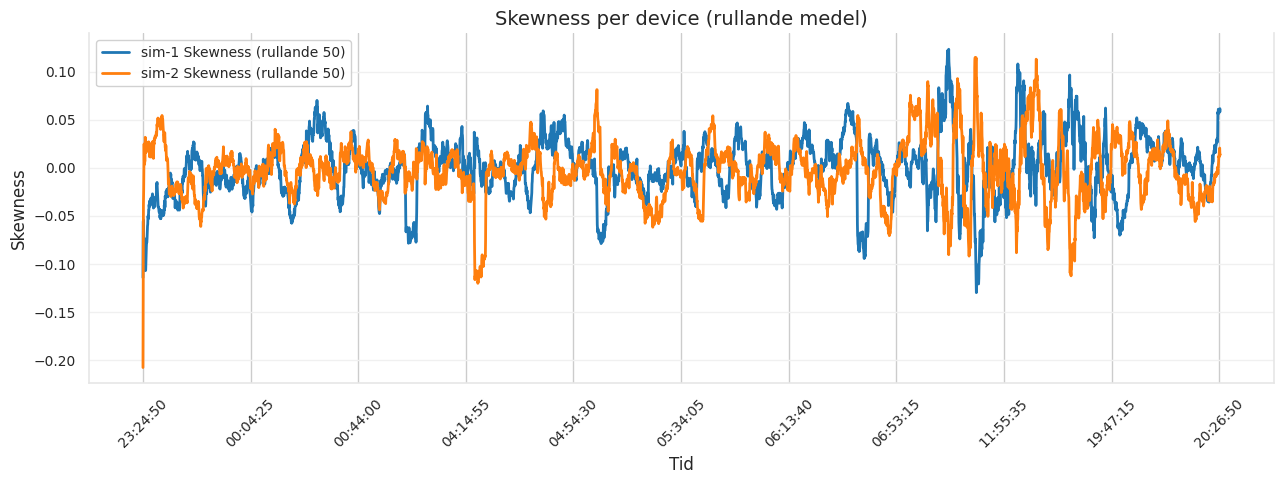

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Läs TSV och fixa svenska decimaler
df = pd.read_csv("iiot_rms.csv", sep="\t", encoding="utf-8-sig")
df.columns = df.columns.str.strip()
df["Skewness"] = pd.to_numeric(df["Skewness"].astype(str).str.replace(",", ".", regex=False),
                               errors="coerce")

# 2) Sortera och rullande medel
win = 50
df = df.sort_values(["device_id", "Date", "time"])
df["Skew_roll"] = (df.groupby("device_id")["Skewness"]
                     .rolling(win, min_periods=1).mean()
                     .reset_index(level=0, drop=True))

# 3) Stil (samma som Crest Factor)
plt.rcParams.update({
    "figure.figsize": (13, 5),
    "axes.edgecolor": "#e6e6e6",
    "axes.linewidth": 1.2,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# 4) Plotta per device
fig, ax = plt.subplots()
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

for i, (dev, g) in enumerate(df.groupby("device_id")):
    ax.plot(g["time"], g["Skew_roll"],
            color=palette[i % len(palette)], linewidth=2,
            label=f"{dev} Skewness (rullande {win})")

# 5) Layout
unique_times = df["time"].astype(str).unique()
step = max(1, len(unique_times)//10)
ax.set_xticks(unique_times[::step])
ax.tick_params(axis="x", rotation=45)

ax.set_title("Skewness per device (rullande medel)")
ax.set_xlabel("Tid")
ax.set_ylabel("Skewness")
ax.spines["top"].set_visible(False)
ax.grid(True, axis="y", color="#f0f0f0")
ax.legend(loc="upper left", frameon=True, fancybox=True, framealpha=0.9)

plt.tight_layout()
plt.show()
# plt.savefig("skewness_rullande.png", dpi=180, bbox_inches="tight")


### Skewness per Enhet (Rullande Medelvärde)

Grafen visar den rullande **skewnessen** för `sim-1` och `sim-2`.  
**Skewness** mäter hur symmetrisk signalens fördelning är runt medelvärdet:

$$
\text{Skewness} = \frac{E[(x - \mu)^3]}{\sigma^3}
$$

- Ett värde nära **0** → signalen är symmetrisk (normal drift)  
- **Positiv skewness** → fler toppar på den positiva sidan (t.ex. obalans eller slag)  
- **Negativ skewness** → fler extrema värden på den negativa sidan (t.ex. mekanisk belastning åt ett håll)

Rullande medelvärde används för att jämna ut kortvariga variationer.  
Skewness hjälper till att **identifiera asymmetriska vibrationer**, vilket kan tyda på att en axel, rotor eller lager börjar uppträda onormalt.


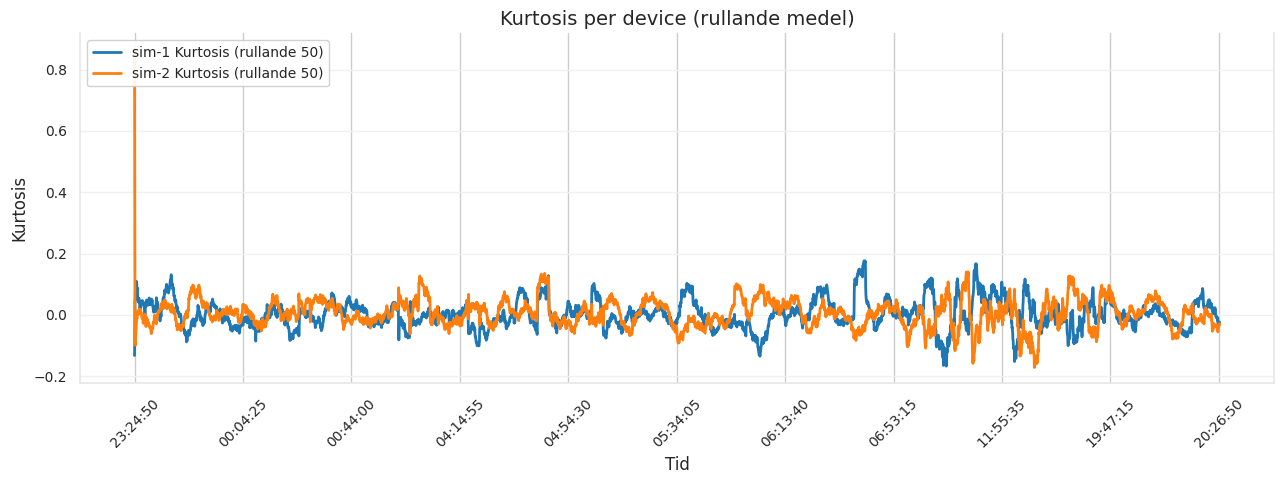

In [29]:
df["Kurtosis"] = pd.to_numeric(df["Kurtosis"].astype(str).str.replace(",", ".", regex=False),
                               errors="coerce")

df["Kurt_roll"] = (df.groupby("device_id")["Kurtosis"]
                     .rolling(win, min_periods=1).mean()
                     .reset_index(level=0, drop=True))

fig, ax = plt.subplots()
for i, (dev, g) in enumerate(df.groupby("device_id")):
    ax.plot(g["time"], g["Kurt_roll"],
            color=palette[i % len(palette)], linewidth=2,
            label=f"{dev} Kurtosis (rullande {win})")

unique_times = df["time"].astype(str).unique()
step = max(1, len(unique_times)//10)
ax.set_xticks(unique_times[::step])
ax.tick_params(axis="x", rotation=45)

ax.set_title("Kurtosis per device (rullande medel)")
ax.set_xlabel("Tid")
ax.set_ylabel("Kurtosis")
ax.spines["top"].set_visible(False)
ax.grid(True, axis="y", color="#f0f0f0")
ax.legend(loc="upper left", frameon=True, fancybox=True, framealpha=0.9)

plt.tight_layout()
plt.show()
# plt.savefig("kurtosis_rullande.png", dpi=180, bbox_inches="tight")


### Kurtosis per Enhet (Rullande Medelvärde)

Grafen visar den rullande **kurtosisen** för `sim-1` och `sim-2`.  
**Kurtosis** beskriver hur spetsig signalens fördelning är jämfört med en normalfördelning:

$$
\text{Kurtosis} = \frac{E[(x - \mu)^4]}{\sigma^4}
$$

- **Kurtosis ≈ 3** → normal vibration (gaussisk signal)  
- **Hög kurtosis (>3)** → förekomst av toppar/stötar (lagerdefekt, glapp, stöt)  
- **Låg kurtosis (<3)** → dämpad eller jämn vibration

Ett rullande medelvärde på 50 punkter används för att filtrera bort brus.  
Kurtosis används ofta i **lagerdiagnostik** för att upptäcka **slag, defekter eller plötsliga energitoppar** i vibrationssignaler.


### Band Energy per Enhet (Rullande Medelvärde)

Grafen visar den rullande **bandenergin** för `sim-1` och `sim-2`.  
**Band Energy** beskriver den totala energin i signalens frekvensområde (t.ex. 0–200 Hz):

$$
E_{\text{band}} = \sum_{f = f_\text{low}}^{f_\text{high}} |X(f)|^2
$$

där \( X(f) \) är signalens FFT-spektrum.

Måttet används för att analysera **frekvensspecifik vibrationsenergi** och övervaka om vissa frekvensband får ökad energi — vilket kan tyda på slitage, resonans eller obalans.

Rullande medelvärde gör att långsamma trender syns tydligare.  
Hög bandenergi indikerar **ökad mekanisk aktivitet eller onormal resonans** i systemet.



Band Energy non-null: 9510


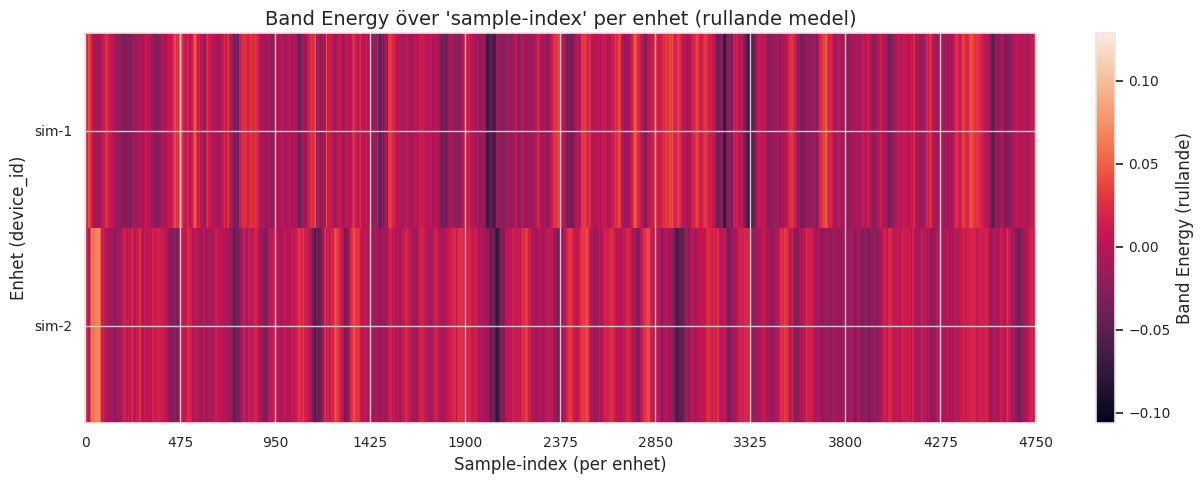

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Läs & städa
df = pd.read_csv("iiot_rms.csv", sep="\t", encoding="utf-8-sig")
df.columns = df.columns.str.strip()
col = "Band Energy"  # exakt namn (med mellanslag)
df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ".", regex=False), errors="coerce")

# Snygg sanity check
print("Band Energy non-null:", df[col].notna().sum())

# 2) Sortera och rullande medel per enhet (valfritt)
win = 50
df = df.sort_values(["device_id", "Date", "time"])
df["BE_roll"] = (df.groupby("device_id")[col]
                   .rolling(win, min_periods=1).mean()
                   .reset_index(level=0, drop=True))

# 3) Skapa sample-index per enhet (ger tät matris)
df["t_idx"] = df.groupby("device_id").cumcount()

# 4) Pivot → device_id × t_idx
pivot = df.pivot_table(values="BE_roll", index="device_id", columns="t_idx", aggfunc="mean")

# Fyll luckor och skala om (om du vill se kontrast)
pivot = pivot.fillna(0.0)

# 5) Plot (matplotlib heatmap)
plt.figure(figsize=(13, 5))
im = plt.imshow(pivot.values, aspect="auto", interpolation="nearest")
plt.colorbar(im, label="Band Energy (rullande)")
plt.yticks(ticks=np.arange(pivot.shape[0]), labels=pivot.index)
# X-axel: glesa etiketter
step = max(1, pivot.shape[1] // 10)
plt.xticks(ticks=np.arange(0, pivot.shape[1], step), labels=np.arange(0, pivot.shape[1], step))
plt.title("Band Energy över 'sample-index' per enhet (rullande medel)")
plt.xlabel("Sample-index (per enhet)")
plt.ylabel("Enhet (device_id)")
plt.tight_layout()
plt.show()


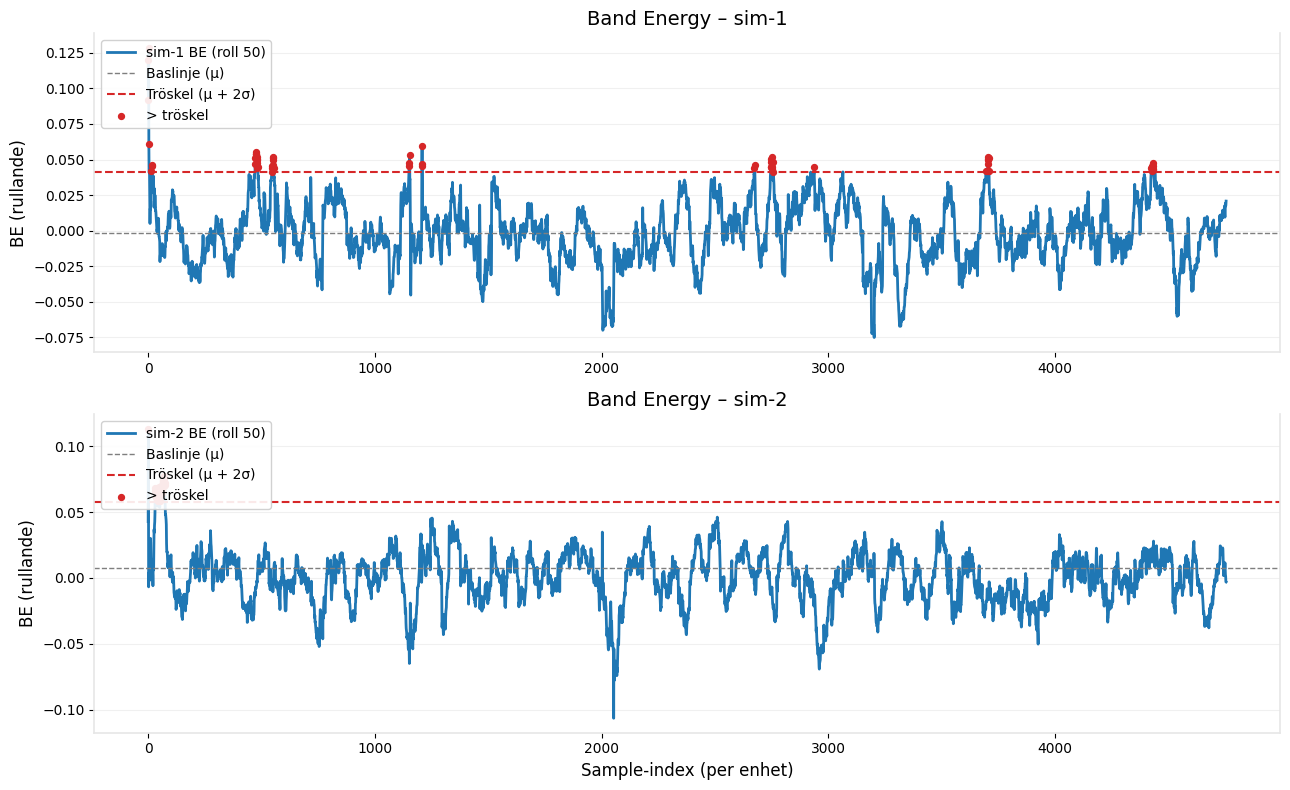

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Läs & förbered ------------------------------------------------------
df = pd.read_csv("iiot_rms.csv", sep="\t", encoding="utf-8-sig")
df.columns = df.columns.str.strip()
COL = "Band Energy"
df[COL] = pd.to_numeric(df[COL].astype(str).str.replace(",", ".", regex=False), errors="coerce")

df = df.sort_values(["device_id", "Date", "time"])
df["t_idx"] = df.groupby("device_id").cumcount()

WIN = 50
df["BE_roll"] = (df.groupby("device_id")[COL]
                   .rolling(WIN, min_periods=1).mean()
                   .reset_index(level=0, drop=True))

# --- 2) Baslinje + tröskel per device --------------------------------------
def baseline_stats(g, frac=0.10, k=2.0):
    n0 = max(5, int(len(g) * frac))
    base = g.iloc[:n0].dropna()
    if base.empty:
        return pd.Series({"mu": np.nan, "thr": np.nan})
    mu  = float(base.mean())
    sig = float(base.std(ddof=1)) if len(base) > 1 else 0.0
    return pd.Series({"mu": mu, "thr": mu + k*sig})

stats = (df.groupby("device_id")["BE_roll"]
           .apply(baseline_stats)
           .unstack())  # kolumner: ['mu','thr']

# --- 3) Plot -----------------------------------------------------------------
plt.rcParams.update({
    "figure.figsize": (13, 5),
    "axes.edgecolor": "#e6e6e6",
    "axes.linewidth": 1.2,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

devices = df["device_id"].unique()
fig, axes = plt.subplots(len(devices), 1, figsize=(13, 4*len(devices)), sharex=False)
if len(devices) == 1: axes = [axes]

for ax, (dev, g) in zip(axes, df.groupby("device_id")):
    ax.plot(g["t_idx"], g["BE_roll"], lw=2, label=f"{dev} BE (roll {WIN})")

    mu  = float(np.nan_to_num(stats.loc[dev, "mu"],  nan=0.0))
    thr = float(np.nan_to_num(stats.loc[dev, "thr"], nan=np.nan))

    ax.axhline(mu,  color="#7f7f7f", ls="--", lw=1,  label="Baslinje (μ)")
    if np.isfinite(thr):
        ax.axhline(thr, color="#d62728", ls="--", lw=1.5, label="Tröskel (μ + 2σ)")
        over = g[g["BE_roll"] > thr]
        if not over.empty:
            ax.scatter(over["t_idx"], over["BE_roll"], s=18, color="#d62728", zorder=3, label="> tröskel")

    ax.set_title(f"Band Energy – {dev}")
    ax.set_ylabel("BE (rullande)")
    ax.grid(True, axis="y", color="#f0f0f0")
    ax.spines["top"].set_visible(False)
    ax.legend(loc="upper left", frameon=True, fancybox=True, framealpha=0.9)

axes[-1].set_xlabel("Sample-index (per enhet)")
plt.tight_layout()
plt.show()



### 🔹 Band Energy över tid per enhet (rullande medel) ⚡️ FFT fast Fourier transform

**Band Energy** (BE) är den totala vibrationsenergin inom 0–200 Hz efter FFT-analys av lagersensordata.

## Grafens komponenter

| Element                         | Betydelse                                                                                   |
| ------------------------------- | ------------------------------------------------------------------------------------------- |
| **Blå kurva**                   | Rullande Band Energy över tiden för varje sensor (sim-1, sim-2) med 50-samples fönster |
| **Grå linje (μ)**               | Medelvärdet – den normala energinivån                                              |
| **Röd streckad linje (μ + 2σ)** | Tröskelvärde (medel + 2 standardavvikelser). Punkter över denna anses onormala |
| **Röda prickar**                | Tidssteg där energin överstiger tröskeln → potentiell anomali                |

## Fysikalisk betydelse

FFT bryter ner vibrationssignalen i frekvenskomponenter. Band Energy summerar effekten inom lågfrekvensområdet:

$$
\text{Band Energy} = \sum_{f=0}^{200 \text{ Hz}} |\text{FFT}(f)|^2
$$

Lågfrekventa vibrationer (0–200 Hz) indikerar ofta obalans, feljustering eller mjuka lagerdefekter. Återkommande överskridanden signalerar begynnande slitage eller förändringar i maskinens dynamiska beteende.

## Syfte

Visualiseringen identifierar när och hos vilken enhet energinivån ökar. Det möjliggör tidig upptäckt av onormala mönster och därmed prediktivt underhåll innan faktiskt fel inträffar.



### 📏 Standardisering och val av features

De matematiska mått som används i projektet – RMS, Peak-to-Peak, Crest Factor, Kurtosis och Band Energy (FFT) – är etablerade och globalt standardiserade indikatorer inom vibrationsanalys och tillståndsövervakning av roterande maskiner.

Projektets beräkningar följer internationella riktlinjer enligt:

ISO 10816 / 20816 – Bedömning av maskinvibrationer baserat på RMS-värden.

ISO 13373-1 → 13373-9 – Metodik för vibrationsanalys (hur man tolkar RMS, Crest Factor, Kurtosis m.fl.).

ISO 17359 – Allmän procedur för tillståndsövervakning (Condition Monitoring).

VDI 3834 – Tysk industristandard för praktisk vibrationsdiagnostik.

I dessa standarder betraktas RMS-nivån som huvudindikator för maskinens hälsotillstånd, medan kompletterande mått som Peak-to-Peak, Crest Factor och Kurtosis används för att upptäcka tidiga tecken på obalans, lagerfel eller stötar.
Band Energy, som beräknas via FFT-analys (0–200 Hz), används för att isolera frekvensband med hög energikoncentration och därmed identifiera specifika källor till vibrationer.

Projektets machine_health-bucket i InfluxDB innehåller därför matematiskt bearbetade och standardiserade features  inte rådata  vilket gör att resultaten är jämförbara med professionella system som används av företag som SKF, Siemens, ABB och Emerson.

                📁 Femto Dataset (Parquet)
                          │
                          ▼
              🟩 1. Data Replayer (Python)
        ───────────────────────────────────
        • Läser råa vibrationssignaler (ax, ay, az)
        • Publicerar JSON-events till Azure Event Hub
        • Loopar kontinuerligt för att simulera realtid
                          │
                          ▼
              🟦 2. RMS + FFT Service (Python)
        ───────────────────────────────────
        • Tar emot råsignaler från Event Hub
        • Beräknar:
              - RMS (signalens energinivå)
              - Peak Frequency (dominerande frekvens)
              - Band Energy (energi inom 0–200 Hz)
        • Sparar resultaten i InfluxDB Cloud
              (bucket: machine_health)
                          │
                          ▼
              🟥 3. Scorer-Final (Isolation Forest)
        ───────────────────────────────────
        • Läser features från bucket `machine_health`
        • Beräknar anomaly score med ML-modell:
              - score ∈ [0, 1]
              - score > 0.2 ⇒ möjlig anomali
        • Sparar resultat i bucket `anomaly_scores`
                          │
                          ▼
                 📊 4. Grafana Cloud Dashboard
        ───────────────────────────────────
        • Visualiserar RMS, Band Energy och Anomaly Scores
        • Färgkodade larm (grön/gul/röd)
        • Realtidsöversikt per maskin (sim-1, sim-2)


| Steg | Komponent    | Input               | Output                 | Bucket / Källa   | Datatyp         |
| ---- | ------------ | ------------------- | ---------------------- | ---------------- | --------------- |
| 1️⃣  | Replayer     | Parquet-fil (Femto) | ax, ay, az (JSON)      | Event Hub        | 🟠 Rådata       |
| 2️⃣  | RMS + FFT    | ax, ay, az          | RMS, Peak, Band Energy | `machine_health` | 🔵 Feature-data |
| 3️⃣  | Scorer-final | Features            | Anomaly Score          | `anomaly_scores` | 🔴 ML-resultat  |
| 4️⃣  | Grafana      | InfluxDB            | Visualisering          | —                | 📊 Dashboards   |


| Steg | App / Komponent       | Data som tas emot                | Data som skickas vidare                                   | Typ av data         |
| ---- | --------------------- | -------------------------------- | --------------------------------------------------------- | ------------------- |
| 1️⃣  | **Replayer**          | Parquet-fil (Femto)              | Råsignaler (ax, ay, az) → Event Hub                       | 🟠 **Rådata**       |
| 2️⃣  | **RMS + FFT Service** | Råsignaler från Event Hub        | RMS, Peak Freq, Band Energy → InfluxDB (`machine_health`) | 🔵 **Feature-data** |
| 3️⃣  | **Scorer-final (ML)** | Features (från `machine_health`) | Anomaly score → InfluxDB (`anomaly_scores`)               | 🔴 **ML-resultat**  |


<div style="font-family: Arial, sans-serif; max-width: 860px; line-height:1.35">

  <!-- Source -->
  <div style="background:#3d3d29; padding:12px; margin-bottom:6px; border-left:4px solid #9e9e75; border-radius:6px;">
    <strong style="color:#e6e6d4;">📁 Femto Dataset (Parquet)</strong>
  </div>

  <!-- Arrow + label -->
  <div style="text-align:center; color:#888; font-size:13px; margin:2px 0 6px 0;">
    ↓<br><span>Inläst lokalt av Replayer</span>
  </div>

  <!-- Replayer -->
  <div style="background:#2d3d2d; padding:12px; margin-bottom:6px; border-left:4px solid #6b9b6b; border-radius:6px;">
    <strong style="color:#d4e6d4;">🟩 1. Data Replayer (Python + Docker)</strong><br>
    <span style="color:#b8d4b8; font-size:14px;">
      • Läser råa vibrationssignaler (ax, ay, az, fs)<br>
      • Publicerar JSON-events till Azure Event Hub<br>
      • Loopar för att simulera realtid
    </span>
  </div>

  <!-- Arrow + datatype -->
  <div style="text-align:center; color:#888; font-size:13px; margin:2px 0 6px 0;">
    ↓<br><span>Rådata (ax, ay, az, fs, timestamp)</span>
  </div>

  <!-- Event Hub -->
  <div style="background:#24364a; padding:12px; margin-bottom:6px; border-left:4px solid #6b8db5; border-radius:6px;">
    <strong style="color:#d4dfe6;">☁️ Azure Event Hub</strong><br>
    <span style="color:#b8c9d4; font-size:14px;">
      • Buffert/transport av strömmad rådata<br>
      • Konsumeras av RMS+FFT-tjänsten
    </span>
  </div>

  <!-- Arrow + label -->
  <div style="text-align:center; color:#888; font-size:13px; margin:2px 0 6px 0;">
    ↓<br><span>Rådata → bearbetning</span>
  </div>

  <!-- RMS + FFT -->
  <div style="background:#2d3540; padding:12px; margin-bottom:6px; border-left:4px solid #6b8db5; border-radius:6px;">
    <strong style="color:#d4dfe6;">🟦 2. RMS + FFT Service (Python)</strong><br>
    <span style="color:#b8c9d4; font-size:14px;">
      • Beräknar <b>RMS</b>, <b>Peak Frequency</b>, <b>Band Energy (0–200&nbsp;Hz)</b><br>
      • Skriver features som tidsserier
      till <code style="background:#1e1e1e; color:#eee; padding:2px 6px; border-radius:4px;">machine_health</code>
    </span>
  </div>

  <!-- Arrow + datatype -->
  <div style="text-align:center; color:#888; font-size:13px; margin:2px 0 6px 0;">
    ↓<br><span>Feature-data (RMS, f<sub>peak</sub>, Band&nbsp;Energy)</span>
  </div>

  <!-- InfluxDB Cloud -->
  <div style="background:#2f2636; padding:12px; margin-bottom:6px; border-left:4px solid #b5966b; border-radius:6px;">
    <strong style="color:#ecdccc;">🗄️ InfluxDB Cloud</strong><br>
    <span style="color:#e0cfb9; font-size:14px;">
      • Bucket: <code style="background:#1e1e1e; color:#eee; padding:2px 6px; border-radius:4px;">machine_health</code> (features)<br>
      • Bucket: <code style="background:#1e1e1e; color:#eee; padding:2px 6px; border-radius:4px;">anomaly_scores</code> (ML-score)
    </span>
  </div>

  <!-- Arrow + label -->
  <div style="text-align:center; color:#888; font-size:13px; margin:2px 0 6px 0;">
    ↓<br><span>Features → ML-bedömning</span>
  </div>

  <!-- Scorer -->
  <div style="background:#402d2d; padding:12px; margin-bottom:6px; border-left:4px solid #b56b6b; border-radius:6px;">
    <strong style="color:#e6d4d4;">🟥 3. Scorer-Final (Isolation Forest)</strong><br>
    <span style="color:#d4b8b8; font-size:14px;">
      • Läser features från <code style="background:#1e1e1e; color:#eee; padding:2px 6px; border-radius:4px;">machine_health</code><br>
      • Beräknar <b>anomaly score ∈ [0, 1]</b> (tröskel ~ 0.2)<br>
      • Skriver till <code style="background:#1e1e1e; color:#eee; padding:2px 6px; border-radius:4px;">anomaly_scores</code>
    </span>
  </div>

  <!-- Arrow + datatype -->
  <div style="text-align:center; color:#888; font-size:13px; margin:2px 0 6px 0;">
    ↓<br><span>ML-resultat (anomaly score per sensor & tidpunkt)</span>
  </div>

  <!-- Grafana -->
  <div style="background:#3d3529; padding:12px; border-left:4px solid #b5966b; border-radius:6px;">
    <strong style="color:#e6dfd4;">📊 4. Grafana Cloud Dashboard</strong><br>
    <span style="color:#d4c9b8; font-size:14px;">
      • Visualiserar RMS, Band Energy, Peak Frequency och Anomaly Score<br>
      • Färgkodade larm (grön/gul/röd), vyer per enhet (sim-1, sim-2)
    </span>
  </div>

</div>
